In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [3]:
amazon_ratings = pd.read_csv('ratings_Electronics.csv')

In [4]:
amazon_ratings.columns = ['UserId', 'ProductId', 'Rating', 'Timestamp'] 

In [5]:
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [6]:
# Dropping time stamp column as we are not going to use it

amazon_ratings = amazon_ratings.drop(['Timestamp'], axis=1)

In [7]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
UserId       object
ProductId    object
Rating       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [8]:
amazon_ratings.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserId,7824481,4201696,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,7824481,476001,B0074BW614,18244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,7.82448e+06,NaN,NaN,NaN,4.01234,1.38091,1,3,5,5,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000161D23FFB00>]],
      dtype=object)

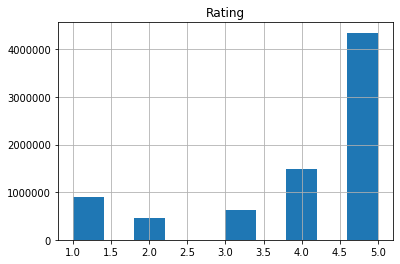

In [9]:
amazon_ratings.hist()

In [10]:
## Finding out ratings given by users >50

user_groupby = amazon_ratings.groupby('UserId',as_index=False)
user_review_count = user_groupby['ProductId'].count()
user_review_count.columns = ['UserId','count']

users_g_fifty = user_review_count.loc[user_review_count['count']>50]

amazon_ratings_2 = amazon_ratings.loc[amazon_ratings['UserId'].isin(users_g_fifty['UserId'])]

In [11]:
amazon_ratings_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122171 entries, 117 to 7824443
Data columns (total 3 columns):
UserId       122171 non-null object
ProductId    122171 non-null object
Rating       122171 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.7+ MB



### Transforming data to surprise format


In [23]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [24]:
data = Dataset.load_from_df(amazon_ratings_2[['UserId', 'ProductId', 'Rating']], reader)

In [25]:
data

In [26]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=123)

In [27]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [31]:
algo = KNNWithMeans(k=51, sim_options={'name': 'pearson', 'user_based': False})
algo.fit(trainset)

### Getting memory issue even after using 8 GB ram :(

Computing the pearson similarity matrix...


MemoryError: 

### Recommendation System - Popularity based

In [12]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226
B003ELYQGG,11617
B003ES5ZUU,10276
B007R5YDYA,9907
B00622AG6S,9823


In [13]:
#### The above list gives top 10 popular products based on the ratings

### Recommendation System - Collabarative filtering


In [14]:
ratings_matrix = amazon_ratings_2.pivot_table(index=['ProductId'],columns=['UserId'],values='Rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix.head(15)

UserId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
product_similarity=cosine_similarity(ratings_matrix)
np.fill_diagonal( movie_similarity, 0 ) 
movie_similarity